In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sympy as spy
from IPython.display import display, Image
spy.init_printing()

# Filtro con amplificación

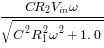

\frac{C R_{2} V_{in} \omega}{\sqrt{C^{2} R_{1}^{2} \omega^{2} + 1.0}}


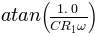

atan(1.0/(C*R_1*\omega))


In [2]:
omega, C, R_1, R_2, V_in = spy.symbols('\omega C R_1 R_2 V_{in}', real=True, positive=True)

Z_eq = 1/(1j*omega*C) + R_1

V_out = -(R_2/Z_eq)*V_in

real, imag = V_out.as_real_imag()

amplitude = spy.sqrt(real**2 + imag**2).simplify()
phase = spy.atan(imag/real)

display(amplitude)
print(spy.latex(amplitude))
display(phase)
print(phase)

CONSTANT_R_1 = 10e3
CONSTANT_R_2 = 100e3
CONSTANT_C = 0.1e-6
CONSTANT_V_in = 1

substitutions = [(R_1, CONSTANT_R_1), (R_2, CONSTANT_R_2), (C, CONSTANT_C), (V_in, CONSTANT_V_in)]

In [3]:
eq = spy.denom(amplitude)
solutions = spy.solve(eq-spy.sqrt(2), omega)[0]
display(solutions)
omega_c = float(solutions.subs(substitutions))

In [8]:
V_out = V_out.subs(substitutions).simplify()
V_c = V_out.evalf(subs = {omega:omega_c})

V_c = float(abs(V_c))

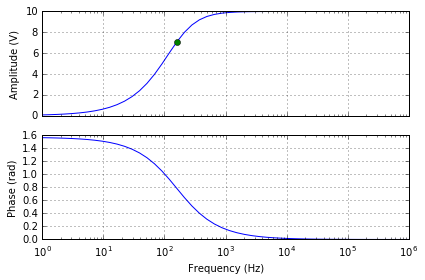

In [9]:
freq = np.logspace(0, 6)
Vouts = np.zeros_like(freq)
phases = np.zeros_like(freq)
for i,w in enumerate(freq):
    sol = V_out.evalf(subs = {omega:w*2*np.pi})
    Vouts[i] = abs(sol)
    phases[i] = spy.atan(spy.im(sol)/spy.re(sol))
    
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(freq, Vouts)
ax1.plot([omega_c/(2*np.pi)],[V_c], "o")
ax1.set_xscale('log')
ax1.set_ylabel('Amplitude (V)')
ax1.grid()
ax2.grid()
ax2.plot(freq, phases)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (rad)')
plt.tight_layout()
plt.savefig('filter.pdf')
plt.show()

In [12]:
np.pi/2